In [1]:
import pandas as pd
import numpy as np

In [2]:
# !conda install scikit-learn --y
cols = []
cols.append('fn')
cols.append('event')
cols.append('tE')
cols.append('t0')
cols.append('u0')
for i in range(49):
    cols.append(i)

In [3]:
dfml = pd.read_csv("trainingset/microlensing.csv", names=cols)
dfmlnot = pd.read_csv("trainingset/not_microlensing.csv", names=cols)

dfml["target"] = 1
dfmlnot["target"] = 0

df = pd.concat([dfml, dfmlnot], axis=0)
df = df.sample(frac = 1).reset_index()

df.index

RangeIndex(start=0, stop=22400, step=1)

In [4]:
myt = np.linspace(51543, 53389)
f = 7000 + np.random.uniform(-100, 100, len(myt))

In [5]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN
df.dropna(inplace=True)

# df.dropna().iloc[np.where(df.dropna()==np.inf)]

df = df.reset_index()
df = df.drop(["index", "level_0"], axis=1)
display(df)

,fn,event,tE,t0,u0,0,1,2,3,4,...,40,41,42,43,44,45,46,47,48,target
0,../Crowdsourcecopy/crowdsource/crowdsource/csd...,low_noise_not_mlevent,0,0,0.00,391.646457,305.137691,296.512396,882.968646,390.954156,...,423.398732,714.370965,176.791558,724.148608,250.707974,324.070547,474.856296,685.314378,1044.306128,0
1,../Crowdsourcecopy/crowdsource/crowdsource/csd...,low_noise_not_mlevent,0,0,0.00,983.573938,222.755100,193.211023,572.072000,730.990944,...,0.842490,43.759947,366.095868,86.589880,675.207376,366.992857,118.410327,352.484882,403.541423,0
2,../Crowdsourcecopy/crowdsource/crowdsource/csd...,noise_not_mlevent,0,0,0.00,441.464830,358.249085,195.849196,825.424641,788.689648,...,382.857540,1267.161311,296.111640,1396.731572,607.526855,1356.319466,841.814552,634.456239,486.658730,0
3,../Crowdsourcecopy/crowdsource/crowdsource/csd...,noise_mlevent_orig,0,0,0.00,1.252823,0.955082,0.275586,269.320608,663.870532,...,0.007005,0.000000,0.744642,0.804793,355.416970,525.702447,1318.674033,355.782233,0.629228,1
4,../Crowdsourcecopy/crowdsource/crowdsource/csd...,noise_not_mlevent,0,0,0.00,3171.495239,993.999504,828.781736,1429.530467,796.495675,...,174.089047,561.690395,712.797170,4.675190,562.072586,393.475110,359.275320,680.250591,564.518794,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22311,../Crowdsourcecopy/crowdsource/crowdsource/csd...,noise_not_mlevent,0,0,0.00,1240.627805,1254.296245,6.578505,223.344411,69.153157,...,816.151690,217.403636,1507.022177,1306.302829,672.807733,630.023976,642.848703,669.033956,433.696258,0
22312,../Crowdsourcecopy/crowdsource/crowdsource/csd...,noise_mlevent_new,122,-33,0.28,0.002552,0.000000,0.002591,0.000000,0.000000,...,0.000000,0.000000,0.005665,0.000000,89.388842,0.037145,268.435427,0.000000,0.172316,1
22313,../Crowdsourcecopy/crowdsource/crowdsource/csd...,low_noise_not_mlevent,0,0,0.00,162.848614,35.104636,269.192772,0.000000,0.016003,...,23.085070,270.910938,27.824053,114.890565,134.522811,0.016411,0.009645,23.071173,0.005050,0
22314,../Crowdsourcecopy/crowdsource/crowdsource/csd...,low_noise_not_mlevent,0,0,0.00,38.218612,128.242414,0.762988,355.219332,66.104801,...,0.040851,0.029663,1071.150456,186.854115,218.967116,272.092372,881.893482,217.249867,665.516847,0


In [6]:
event = df["event"]
np.unique(df["event"])

array(['low_noise_mlevent_new', 'low_noise_not_mlevent', 'mlevent',
       'noise_mlevent_new', 'noise_mlevent_orig', 'noise_not_mlevent',
       'not_mlevent'], dtype=object)

In [7]:
df = df.iloc[np.where((event=="low_noise_not_mlevent") | (event=="low_noise_mlevent_new"))]

for count, row in df.iterrows():
    if row["event"]=="low_noise_not_mlevent":
        for i in range(len(row)):
            row.iloc[i]=0
            
df = df.reset_index()
df

,index,fn,event,tE,t0,u0,0,1,2,3,...,40,41,42,43,44,45,46,47,48,target
0,0,../Crowdsourcecopy/crowdsource/crowdsource/csd...,low_noise_not_mlevent,0,0,0.00,391.646457,305.137691,296.512396,882.968646,...,423.398732,714.370965,176.791558,724.148608,250.707974,324.070547,474.856296,685.314378,1044.306128,0
1,1,../Crowdsourcecopy/crowdsource/crowdsource/csd...,low_noise_not_mlevent,0,0,0.00,983.573938,222.755100,193.211023,572.072000,...,0.842490,43.759947,366.095868,86.589880,675.207376,366.992857,118.410327,352.484882,403.541423,0
2,5,../Crowdsourcecopy/crowdsource/crowdsource/csd...,low_noise_mlevent_new,99,-10,0.77,431.348608,545.570171,305.800594,0.019776,...,565.895635,68.198400,0.013902,0.056410,0.034724,0.018537,0.014303,0.042501,0.013901,1
3,10,../Crowdsourcecopy/crowdsource/crowdsource/csd...,low_noise_mlevent_new,586,-4,0.94,0.217303,378.282877,637.075744,0.000000,...,0.000000,0.000000,0.038676,240.198333,266.633972,0.000000,262.221818,0.000000,126.659575,1
4,15,../Crowdsourcecopy/crowdsource/crowdsource/csd...,low_noise_not_mlevent,0,0,0.00,1080.173165,936.126648,1031.396678,879.470082,...,884.243869,273.982061,104.306105,439.208487,315.981214,600.914363,284.599335,269.189156,87.053729,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6371,22302,../Crowdsourcecopy/crowdsource/crowdsource/csd...,low_noise_not_mlevent,0,0,0.00,238.839080,115.182045,172.222467,0.000000,...,86.304002,305.153361,0.047771,137.867457,269.333427,0.000000,308.889190,395.753431,309.008953,0
6372,22310,../Crowdsourcecopy/crowdsource/crowdsource/csd...,low_noise_not_mlevent,0,0,0.00,67.586291,244.659054,541.398319,150.892989,...,296.800549,408.307865,901.006568,1844.541728,401.954310,426.539694,947.045638,393.251776,1252.960174,0
6373,22313,../Crowdsourcecopy/crowdsource/crowdsource/csd...,low_noise_not_mlevent,0,0,0.00,162.848614,35.104636,269.192772,0.000000,...,23.085070,270.910938,27.824053,114.890565,134.522811,0.016411,0.009645,23.071173,0.005050,0
6374,22314,../Crowdsourcecopy/crowdsource/crowdsource/csd...,low_noise_not_mlevent,0,0,0.00,38.218612,128.242414,0.762988,355.219332,...,0.040851,0.029663,1071.150456,186.854115,218.967116,272.092372,881.893482,217.249867,665.516847,0


In [8]:
x = df.drop(['target', 'fn', 'tE', 't0', 'u0', 'event', "index"],axis='columns')
y = df["target"]

In [9]:
# x = np.log(x)
# x.replace([np.inf, -np.inf], 0, inplace=True)
x = x/np.max(x)

In [10]:
max(df.index)

6375

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [12]:
max(X_test.index)

6374

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(oob_score=True, n_jobs=-1, verbose=1, criterion="entropy")
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestClassifier(criterion='entropy', n_jobs=-1, oob_score=True,
                       verbose=1)

In [34]:
model.score(X_test,y_test)

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.0s remaining:    1.0s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.0s finished


0.7852664576802508

In [35]:
model = RandomForestClassifier(n_estimators=60, bootstrap=True)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7758620689655172

In [36]:
y_predicted = model.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[521, 130],
       [156, 469]])

In [38]:
copy = X_test.copy()
copy["y_test"] = y_test
copy["y_predicted"] = y_predicted
copy["event"] = np.array(df.iloc[copy.index]["event"])
copy["t0"] = np.array(df.iloc[copy.index]["t0"])
copy["u0"] = np.array(df.iloc[copy.index]["u0"])
copy["tE"] = np.array(df.iloc[copy.index]["tE"])

In [39]:
copy.index, df.index

(Index([2279,  592, 5098,  302,  772, 6014,  790, 3327, 6123, 5639,
        ...
        2347, 3051, 2815, 2840, 5635, 3694,  321, 4707, 1355, 4532],
       dtype='int64', length=1276),
 RangeIndex(start=0, stop=6376, step=1))

In [40]:
np.unique(df["event"])

array(['low_noise_mlevent_new', 'low_noise_not_mlevent'], dtype=object)

Text(58.222222222222214, 0.5, 'Truth')

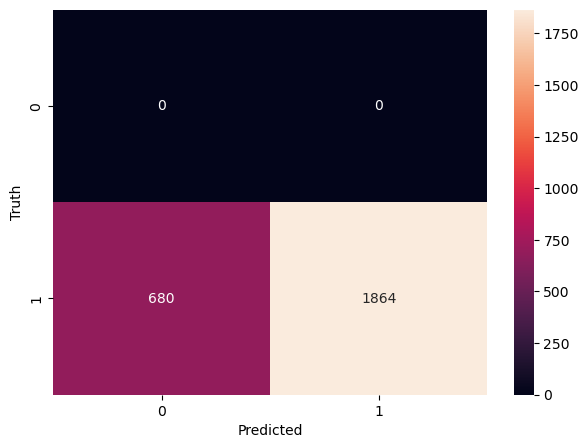

In [17]:
noise_mlevent_orig = copy.iloc[np.where("noise_mlevent_new"==copy["event"])]
mynext = copy.iloc[np.where("noise_mlevent_orig"==copy["event"])]

cm = confusion_matrix(noise_mlevent_orig["y_test"], noise_mlevent_orig["y_predicted"])
cm2 = confusion_matrix(mynext["y_test"], mynext["y_predicted"])
cm = cm + cm2

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(58.222222222222214, 0.5, 'Truth')

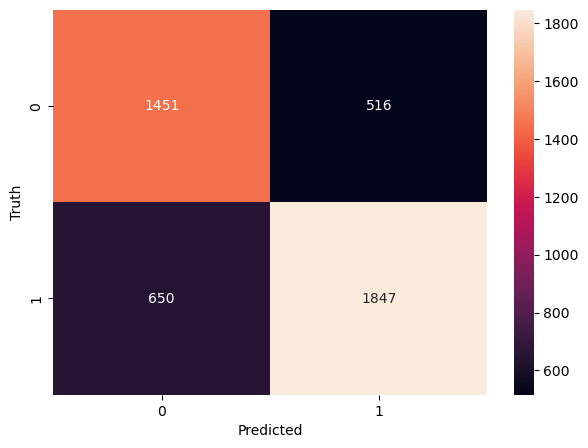

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def pspl_model(mjd, f, u0, tE, t0):
    x = mjd
    t = x - np.min(x) - (np.max(x) - np.min(x))/2 # reformat the time to have the middle at 0
    u = (u0**2 + ((t - t0)/tE)**2)**0.5 # find u(t)
    A = (u**2 + 2)/(u*(u**2 + 4)**0.5) # find A(t)

    return mjd, A*f, A

def getam(numbins, f, x):
    # numbins = 4
    numbins = numbins + 1
    bins = np.linspace(min(f), max(f)+0.001, numbins)
    am = np.zeros((numbins, numbins))
    distm = np.zeros((numbins, numbins))
    countm = np.zeros((numbins, numbins))
    for counti, i in enumerate(f[:]):
        ibin = np.where(bins>i)[0][0]
        for countj, j in enumerate(f[counti:]):
            if counti==countj:
                continue
            jbin = np.where(bins>j)[0][0]
            countm[ibin-1, jbin-1] += 1
            distm[ibin-1, jbin-1] += abs(x[counti] - x[countj])
            am[ibin-1, jbin-1] += 1/abs(x[counti] - x[countj])

    return countm[:-1,:-1], distm[:-1,:-1], am[:-1,:-1]

In [81]:
numdata = np.random.randint(10, len(myt))
indexdatas = np.random.choice([i for i in range(len(myt))], size=numdata, replace=False)
myt = myt[indexdatas]
f = f[indexdatas]
indexdatas

array([45, 31, 41, 24,  5, 40,  0, 48, 44, 15, 13,  8,  6, 27, 21,  2,  1,
       46, 42, 10, 28, 32, 16])

In [82]:
dataset = np.zeros((1000, 50))

for i in range(dataset.shape[0]):
    numbins = 7
    myt = np.linspace(53680, 53980)
    # f = 7000 + np.random.uniform(-5000, 5000, len(myt))
    f = 7000 + np.random.uniform(-100, 100, len(myt))
    
    numdata = np.random.randint(10, len(myt))
    indexdatas = np.random.choice([i for i in range(len(myt))], size=numdata, replace=False)
    myt = myt[indexdatas]
    f = f[indexdatas]

    # plt.scatter(myt, f)

    _, _, am = getam(numbins, f/np.median(f), myt)
    am = am.flatten()
    am = np.append(am, 0)
    dataset[i] = am

    u0 = round(np.random.uniform(0.1, 1), 2)
    tE = round(np.random.uniform(50, max(myt)-min(myt)))
    t0 = 0

    newmyt, newf, _ = pspl_model(myt, f, u0, tE, t0)

    _, _, pam = getam(numbins, newf/np.median(newf), newmyt)
    pam = pam.flatten()
    pam = np.append(pam, 1)
    dataset[int(i + dataset.shape[0]/2)] = pam

    # plt.scatter(newmyt, newf)
    # plt.show()

IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [83]:
dataset.shape

(1000, 50)

In [84]:
dataset

array([[0.6365164 , 0.42345344, 0.5466012 , ..., 0.06533333, 0.0257265 ,
        0.        ],
       [0.25721187, 0.42988195, 0.03945926, ..., 0.01799034, 0.11342593,
        0.        ],
       [0.31674423, 0.48961111, 0.13035285, ..., 0.45401932, 0.29676142,
        0.        ],
       ...,
       [0.92922415, 0.090125  , 0.        , ..., 0.        , 0.01020833,
        1.        ],
       [0.04035138, 0.        , 0.01997323, ..., 0.08797076, 0.25239417,
        1.        ],
       [0.41479319, 0.17374368, 0.40762547, ..., 0.12522222, 0.57183882,
        1.        ]])

In [85]:
newdf = pd.DataFrame(dataset)
newdf = newdf.rename(columns={49:"target"})
newdf = newdf.sample(frac = 1)
newdf = newdf.reset_index()
newdf

,index,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,target
0,709,0.377868,0.170336,0.281340,0.249173,0.347685,0.525274,0.716409,0.697375,0.260015,...,1.522411,0.746734,0.462144,0.095668,0.741992,0.347881,0.226442,0.475624,0.807853,1.0
1,863,0.021000,0.000000,0.016471,0.033079,0.000000,0.014848,0.039794,0.000000,0.000000,...,0.040833,0.090263,0.138704,0.000000,0.104579,0.535144,0.020417,0.045231,0.210789,1.0
2,219,0.085955,0.000000,0.064198,0.023333,0.071812,0.123395,0.081667,0.061635,0.025128,...,0.213385,0.015477,0.046278,0.000000,0.008167,0.000000,0.054444,0.054444,0.163333,0.0
3,195,0.198564,0.124515,0.000000,0.184811,0.325588,0.168778,0.054444,0.063449,0.055806,...,0.108889,0.040833,0.064167,0.011667,0.000000,0.045104,0.210673,0.007424,0.040833,0.0
4,734,1.218922,0.140860,0.824318,1.089929,0.079070,0.891494,0.502235,1.180529,0.785009,...,0.777797,0.382972,0.720393,0.506513,0.455783,0.511881,0.092317,1.123774,0.541008,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,627,0.060711,0.108889,0.028041,0.100333,0.000000,0.000000,0.038442,0.000000,0.006806,...,0.023333,0.063424,0.023333,0.010889,0.008596,0.007778,0.000000,0.000000,0.039667,1.0
996,153,0.220851,0.048604,0.036379,0.007424,0.033425,0.054444,0.206789,0.181049,0.082317,...,0.348376,0.052669,0.070643,0.123426,0.020846,0.051722,0.154983,0.117635,0.088085,0.0
997,751,1.745905,1.681615,0.830951,0.685920,0.812157,0.859638,0.727312,0.486988,0.635778,...,0.197330,0.350095,0.777871,0.751412,0.122370,0.083236,0.325143,0.200243,0.288474,1.0
998,159,0.462754,0.129160,0.363989,0.097093,0.679736,0.322092,0.944008,0.011667,0.005104,...,0.345267,0.841555,0.271535,0.171768,0.052299,0.055036,0.356845,0.073712,1.040811,0.0


In [86]:
x = newdf.drop(['target', "index"],axis='columns')
y = newdf["target"]

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [88]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(oob_score=True, n_jobs=-1, verbose=1, criterion="entropy")
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(criterion='entropy', n_jobs=-1, oob_score=True,
                       verbose=1)

In [89]:
model.score(X_test,y_test)

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.0s remaining:    1.1s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.0s finished


0.72